///---
layout: post
title: "타원을 등간격으로 N 등분하기"
comments: true
share: true
date: 2019-12-04 12:07:00
description: 타원의 호의 길이가 등간격이 되도록 N 등분한다.
tags: python math
toc: true
sitemap :
    changefreq : daily
    priority : 1.0
///---

# 타원을 등간격으로 N 등분하기

타원 호의 길이가 동일하게 타원을 N 등분을 시도해 보았지만 쉽지 않았다. 결국 구글신[1]의 도움을 받아 해결하기는 했지만 이 문제는 직관적으로 해결 가능한 문제가 아니기에 여기에 정리해 둔다.

## 호의 길이 구하기

타원을 적분하기 위한 많은 방법들이 존재한다[2]. 여기서는 incomplete elliptic integral of the second kind[3]을 이용한다.

$$E\left( \phi ,k \right) \equiv \int _{ 0 }^{ \phi }{ \sqrt { 1-{ k }^{ 2 }\sin ^{ 2 }{ (\theta)  }  }  } d\theta$$

$$k=\sqrt{1 - b^2 / a^2}, \quad\quad\quad \text{a: 장축, b: 단축}$$

<figure>
    <img src='../assets/images/Equidistant_on_ecllipse/fig1_dark.png' alt='Figure 1' width="480" />
    <figcaption class="figure-caption">Figure 1</figcaption>
</figure>  

여기서 $\phi$는 원점과 타원 위의 점과의 각도 $\psi$ 와는 다르다. $\phi$는 장축을 반지름으로 하는 원위의 점과 원점과의 각도이다.

위의 함수를 이용하여 타원이 둘레($c$)를 구하는 공식은 다음과 같다.

$$c = 4aE\left(\pi/2, k\right)$$

즉 incomplete elliptic integral of the second kind 함수를 이용하면 장축 a 단축이 b인 타원에서 $\phi$ 각도만큼 이동하였을 경우의 호의 길이를 계산 할 수 있다.


## Code [4]

Python을 이용하여 타원을 등간격으로 N 등분하는 위치를 계산해 본다. 위에서 소개한 incomplete elliptic integral of the second kind 함수는 scipy에서 쉽게 찾을 수 있다. 이 함수의 결과가 등간격이 되는 입력 $\phi$을 구하는 문제는 scipy의 root함수를 이용하면 쉽게 해결 할 수 있다.

### 함수 선언

In [1]:
# Show in Markdown
from scipy.optimize import root as find_root
from numpy.core.umath import pi
from numpy.core.numeric import arange, ndarray
from scipy.special import ellipeinc

def ang_for_equidistant_in_ellipse(num, r_long, r_short):
    """호의 길이가 등간격이 되도록 타원을 N등분하는 각도를 계산한다.

    Parameters
    ----------
    num : int
    r_long : float
    r_short : float

    Returns
    -------
    angles : ndarray
        [rad].

    """
    angles = 2 * pi * arange(num) / num  # 수치 해석에 사용할 각도 초기값
    if r_short != r_long:
        e = (1.0 - r_short ** 2.0 / r_long ** 2.0) ** 0.5
        perimeter = ellipeinc(2.0 * pi, e)

        arcs = arange(num) * (perimeter / num)

        res = find_root(lambda x: (ellipeinc(x, e) - arcs), angles)
        angles = res.x
    return angles

### 예제

In [2]:
# Show in Markdown
a = 20
b = 10
n = 16

phi = ang_for_equidistant_in_ellipse(n, a, b)

e = (1.0 - b ** 2.0 / a** 2.0) ** 0.5
arcs = ellipeinc(phi, e)  # Phi 각도별 호의 길이

### 예제 결과 확인

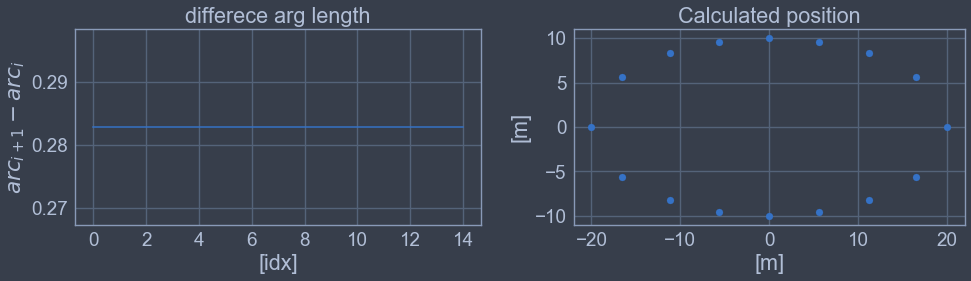

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots
from matplotlib.ticker import MaxNLocator
from numpy import round
from numpy.lib.function_base import diff
from numpy.core.umath import cos, sin
from jupyterthemes import jtplot

jtplot.style('onedork', context='notebook', fscale=1.8)

fig, ax = subplots(nrows=1, ncols=2, figsize=(14, 4.3))
ax[0].plot(round(diff(arcs), 5))
ax[0].set_xlabel('[idx]')
ax[0].set_ylabel('$arc_{i+1} - arc_{i}$')
ax[0].set_title('differece arg length')
ax[0].grid(True)
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))

ax[1].axes.set_aspect('equal')
ax[1].set_axisbelow(True)
ax[1].scatter(a * sin(phi), b * cos(phi))
ax[1].set_xlabel('[m]')
ax[1].set_ylabel('[m]')
ax[1].set_title('Calculated position')
ax[1].grid(True)
fig.tight_layout()

## 참고 자료
[1] https://math.stackexchange.com/questions/172766/calculating-equidistant-points-around-an-ellipse-arc  
[2] https://en.wikipedia.org/wiki/Elliptic_integral  
[3] http://mathworld.wolfram.com/EllipticIntegraloftheSecondKind.html  
[4] https://stackoverflow.com/questions/6972331/how-can-i-generate-a-set-of-points-evenly-distributed-along-the-perimeter-of-an